# 🎯 Profession Prediction using Machine Learning  

A classification-based ML project that predicts the most suitable profession for individuals based on their input features.  
This project applies two popular supervised learning algorithms — 🌳 Random Forest and 📈 Logistic Regression — to analyze and compare prediction performance.

---

## 📊 Dataset Information  
The dataset contains various features (such as interest, attention span ) mapped to target labels representing different professions.  
Preprocessing steps include handling missing values, encoding categorical data, and feature scaling.

---

## 🧠 Machine Learning Models Used  
- 🌳 **Random Forest Classifier**: An ensemble method known for handling non-linear patterns and reducing overfitting.  
- 📈 **Logistic Regression**: A linear model suitable for binary/multi-class classification to provide baseline comparison.

---

## 📌 Objective  
To build a predictive model that can assist in identifying potential career paths for individuals based on available data.

---

## 🔑 Keywords  
Machine Learning, Classification, Profession Prediction, Career Forecasting, Random Forest, Logistic Regression, Supervised Learning


## 1. import Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## 2. load Dataset 

In [2]:
df = pd.read_csv("/kaggle/input/profession-choice-classification/age_interest_career_dataset.csv")

In [3]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,gender,age,age_group,attention_span,creativity_score,logical_reasoning,verbal_intelligence,visual_intelligence,social_skills,motor_skills,...,Math Interest,Computer Games,Social Media Usage,Technology Interest,Career Goals,University Choices,Future Planning,primary_interest,secondary_interest,predicted_job
0,Male,11,9-12,4,4,6,4,7,3,5,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Science,Drawing,Graphic Designer
1,Female,8,5-8,7,1,7,10,10,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Animals,Drawing,Animal Caretaker
2,Male,17,16-18,3,2,10,10,5,9,3,...,NaN,NaN,NaN,NaN,9.0,9.0,1.0,Artificial Intelligence,Psychology,AI Engineer
3,Female,15,13-15,6,1,7,3,3,2,9,...,NaN,2.0,7.0,3.0,NaN,NaN,NaN,Coding,Sports,Software Developer
4,Female,12,9-12,2,5,10,10,7,10,7,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Nature,Dance,Choreographer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,18,16-18,10,10,10,9,5,4,10,...,NaN,NaN,NaN,NaN,2.0,10.0,4.0,Theatre,Artificial Intelligence,Stage Director
96,Male,8,5-8,3,1,6,7,4,8,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Animals,Games,Child Educator
97,Male,18,16-18,7,8,5,5,3,5,8,...,NaN,NaN,NaN,NaN,10.0,7.0,2.0,Artificial Intelligence,Psychology,Psychologist
98,Male,12,9-12,10,1,4,10,6,2,6,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,Nature,Dance,Environmental Engineer


## 3. Information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         100 non-null    object 
 1   age                            100 non-null    int64  
 2   age_group                      100 non-null    object 
 3   attention_span                 100 non-null    int64  
 4   creativity_score               100 non-null    int64  
 5   logical_reasoning              100 non-null    int64  
 6   verbal_intelligence            100 non-null    int64  
 7   visual_intelligence            100 non-null    int64  
 8   social_skills                  100 non-null    int64  
 9   motor_skills                   100 non-null    int64  
 10  Fairy Tale Interest            27 non-null     float64
 11  Motor Skills (Group Specific)  27 non-null     float64
 12  Color Cards                    27 non-null     floa

In [5]:
df['Fairy Tale Interest'].unique()

array([nan,  1.,  8.,  4.,  9., 10.,  2.,  6.,  3.,  5.])

## 4. Treat the Missing Values

In [6]:
df.fillna(-1, inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         100 non-null    object 
 1   age                            100 non-null    int64  
 2   age_group                      100 non-null    object 
 3   attention_span                 100 non-null    int64  
 4   creativity_score               100 non-null    int64  
 5   logical_reasoning              100 non-null    int64  
 6   verbal_intelligence            100 non-null    int64  
 7   visual_intelligence            100 non-null    int64  
 8   social_skills                  100 non-null    int64  
 9   motor_skills                   100 non-null    int64  
 10  Fairy Tale Interest            100 non-null    float64
 11  Motor Skills (Group Specific)  100 non-null    float64
 12  Color Cards                    100 non-null    floa

In [10]:
df['primary_interest'].unique()

array(['Science', 'Animals', 'Artificial Intelligence', 'Coding',
       'Nature', 'Web Design', 'Drawing', 'Robotics', 'Games', 'Dance',
       'Sports', 'Theatre', 'Fairy Tale', 'Psychology', 'Music', 'Drama',
       'Law'], dtype=object)

In [11]:
df['primary_interest'].nunique()

17

In [12]:
df['age_group'].nunique()

4

In [13]:
df['age_group'].unique()

array(['9-12', '5-8', '16-18', '13-15'], dtype=object)

In [14]:
df['secondary_interest'].nunique()

17

In [15]:
df['secondary_interest'].unique()

array(['Drawing', 'Psychology', 'Sports', 'Dance',
       'Artificial Intelligence', 'Science', 'Music', 'Nature',
       'Fairy Tale', 'Law', 'Games', 'Theatre', 'Coding', 'Web Design',
       'Animals', 'Drama', 'Robotics'], dtype=object)

In [23]:
def age_group_map(age_group):
    if age_group in ['5-8', '9-12']:
        return 'Child'
    elif age_group == '13-15':
        return 'Teen'
    elif age_group == '16-18':
        return 'Young Adult'
    else:
        return 'Unknown'


In [24]:
df['age_group'] = df['age_group'].apply(age_group_map)

In [25]:
df

,gender,age,age_group,attention_span,creativity_score,logical_reasoning,verbal_intelligence,visual_intelligence,social_skills,motor_skills,...,Math Interest,Computer Games,Social Media Usage,Technology Interest,Career Goals,University Choices,Future Planning,primary_interest,secondary_interest,predicted_job
0,Male,11,Child,4,4,6,4,7,3,5,...,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Science,Drawing,Graphic Designer
1,Female,8,Child,7,1,7,10,10,5,2,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Animals,Drawing,Animal Caretaker
2,Male,17,Young Adult,3,2,10,10,5,9,3,...,-1.0,-1.0,-1.0,-1.0,9.0,9.0,1.0,Artificial Intelligence,Psychology,AI Engineer
3,Female,15,Teen,6,1,7,3,3,2,9,...,-1.0,2.0,7.0,3.0,-1.0,-1.0,-1.0,Coding,Sports,Software Developer
4,Female,12,Child,2,5,10,10,7,10,7,...,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Nature,Dance,Choreographer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,18,Young Adult,10,10,10,9,5,4,10,...,-1.0,-1.0,-1.0,-1.0,2.0,10.0,4.0,Theatre,Artificial Intelligence,Stage Director
96,Male,8,Child,3,1,6,7,4,8,2,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Animals,Games,Child Educator
97,Male,18,Young Adult,7,8,5,5,3,5,8,...,-1.0,-1.0,-1.0,-1.0,10.0,7.0,2.0,Artificial Intelligence,Psychology,Psychologist
98,Male,12,Child,10,1,4,10,6,2,6,...,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Nature,Dance,Environmental Engineer


## 5. EDA(Exploratory Data analyis

### Distribution among numeric columns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


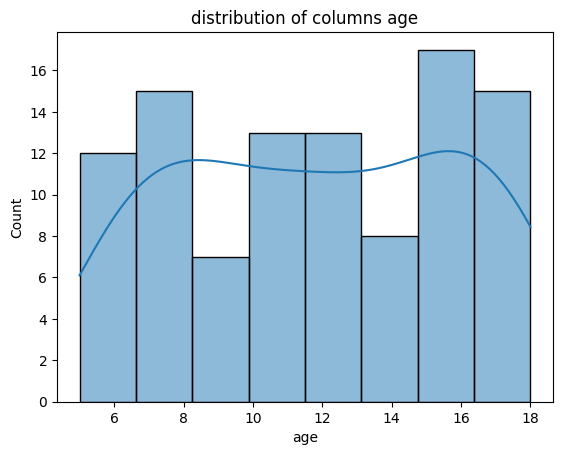

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


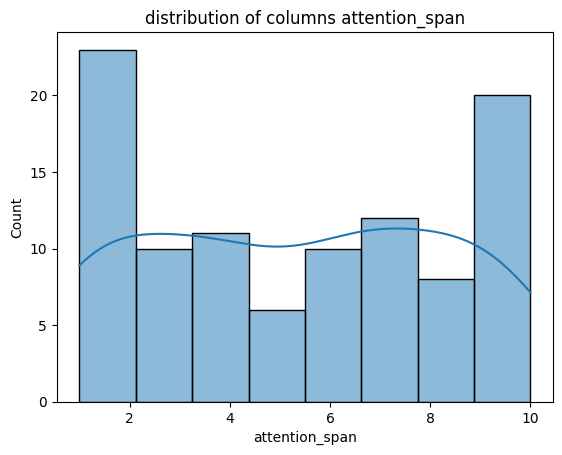

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


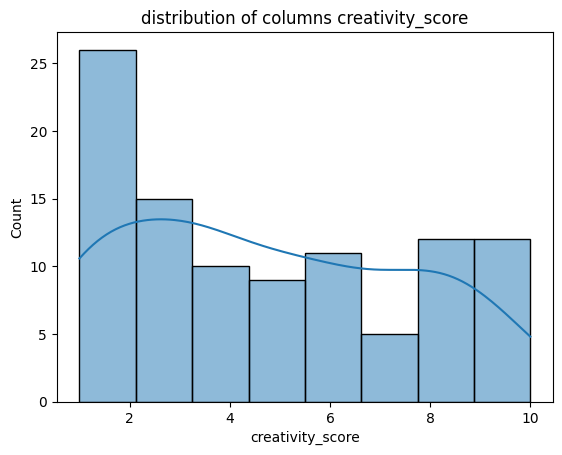

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


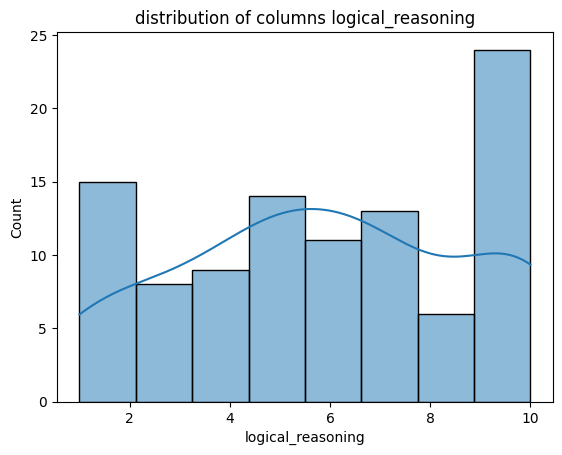

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


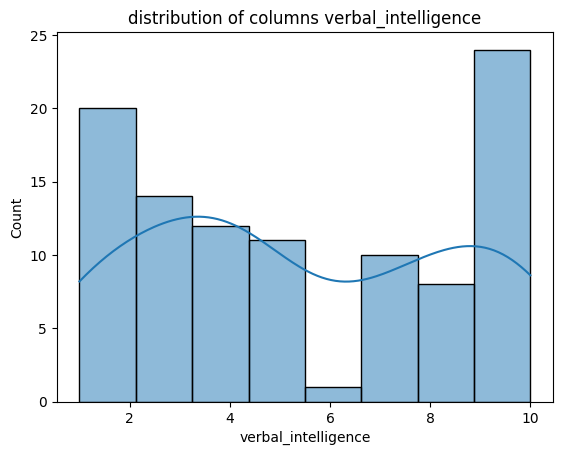

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


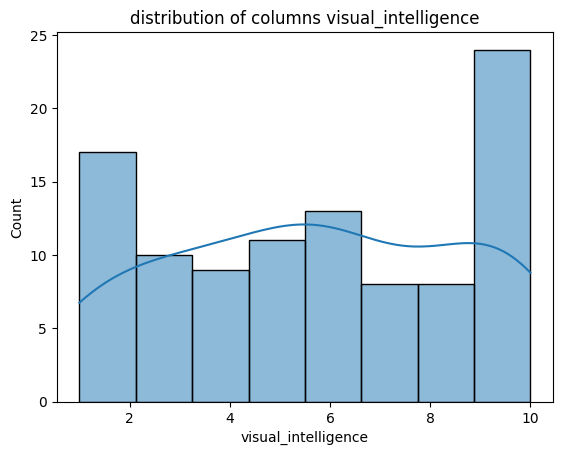

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


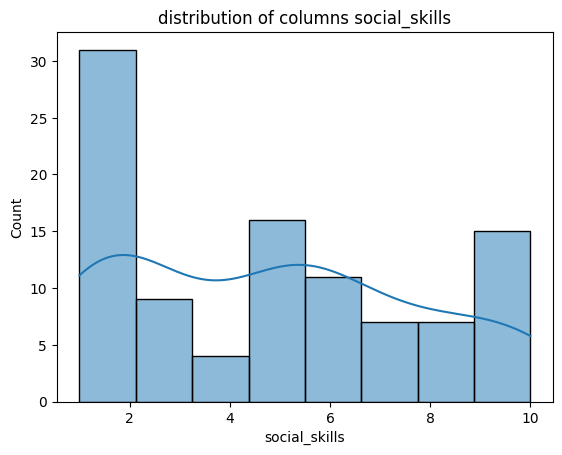

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


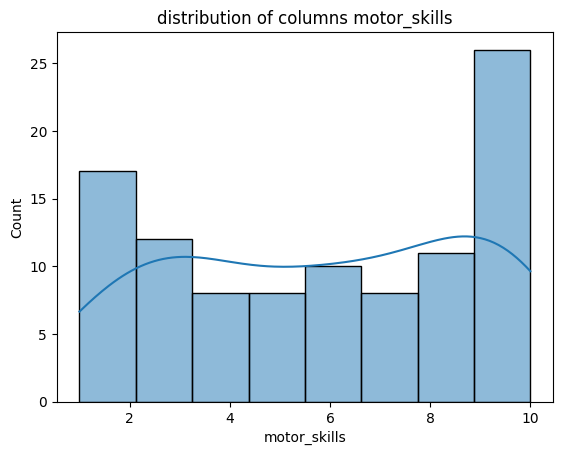

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


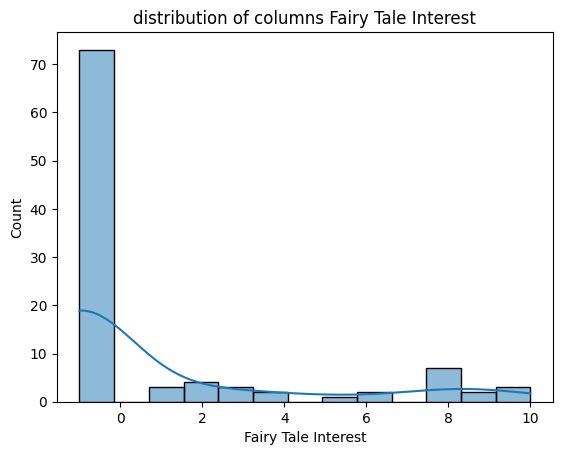

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


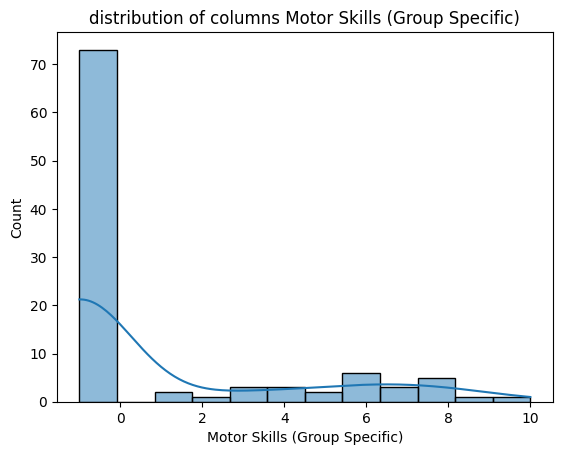

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


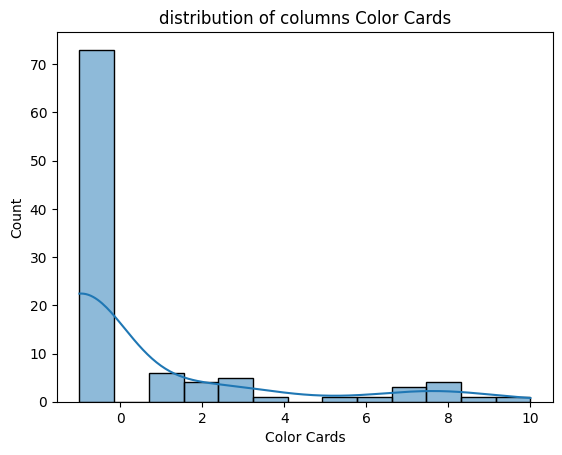

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


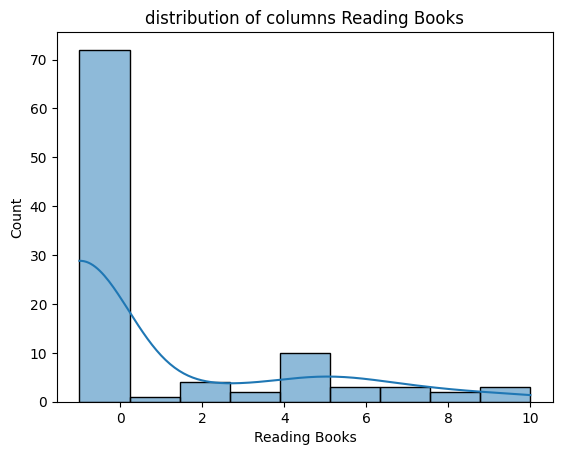

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


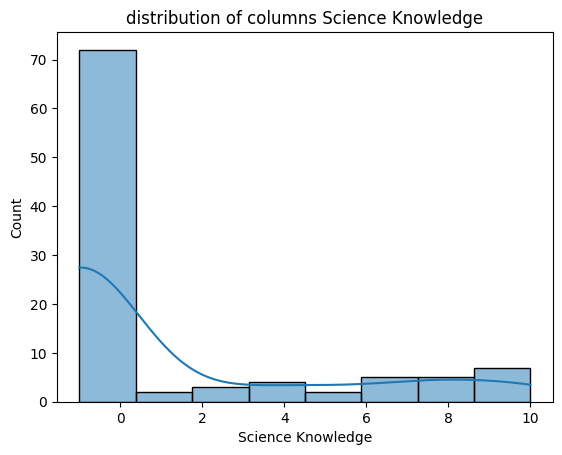

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


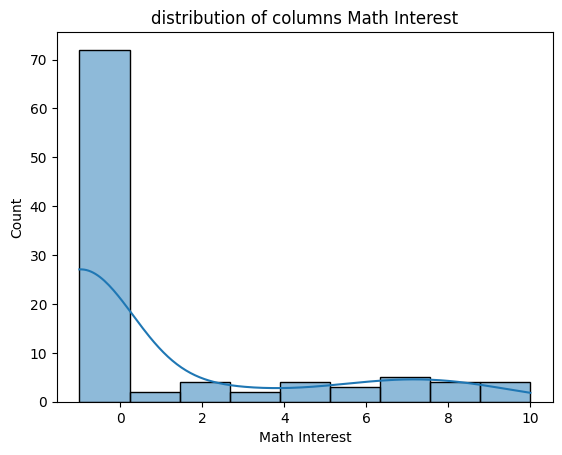

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


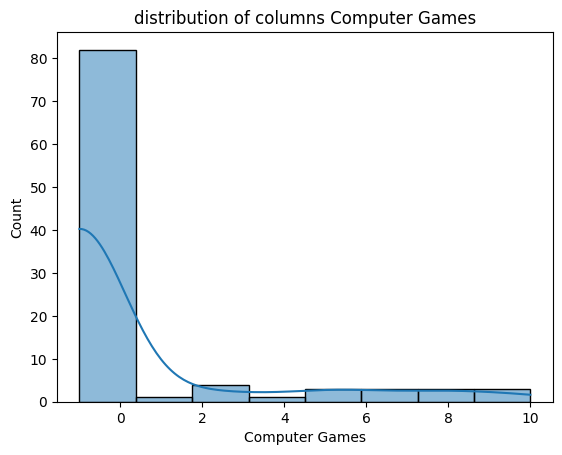

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


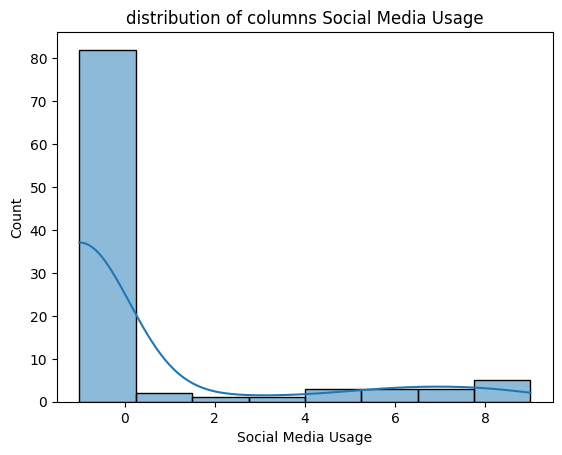

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


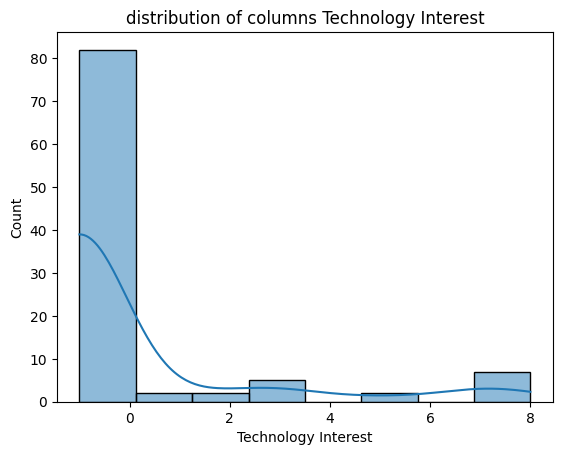

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


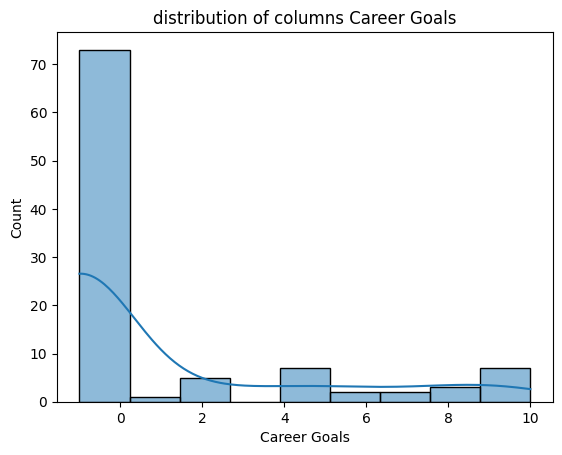

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


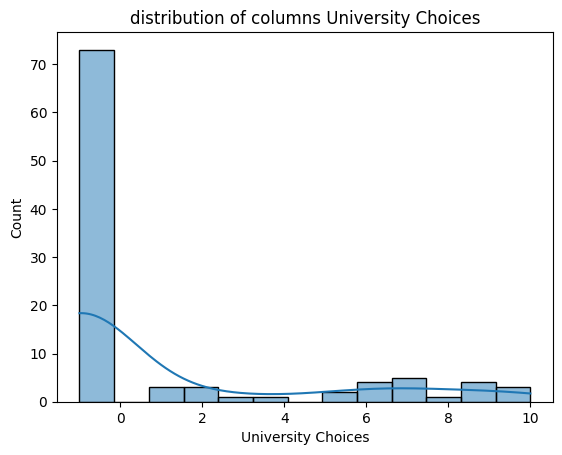

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


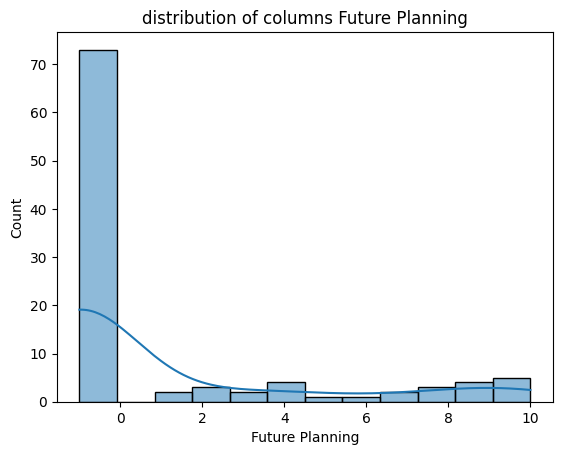

In [26]:
df_numeric = df.select_dtypes(include = 'number')
for col in df_numeric:
    sns.histplot(df[col],kde = True)
    plt.title(f'distribution of columns {col}')
    plt.show()

### Correlaion between numeric numeric columns

In [27]:
corr_matrix = df_numeric.corr()  # Only numeric columns


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


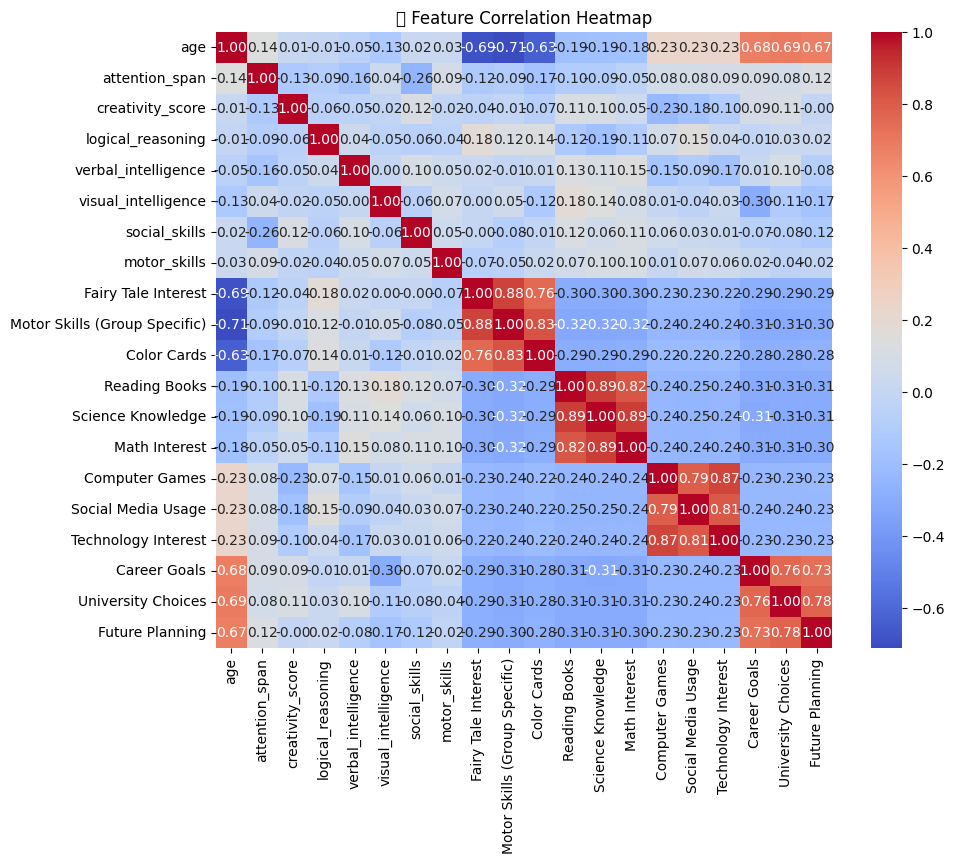

In [28]:
plt.figure(figsize=(10, 8))  # You can adjust the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("🔍 Feature Correlation Heatmap")
plt.show()

### Relation netween categorical and numerical columns

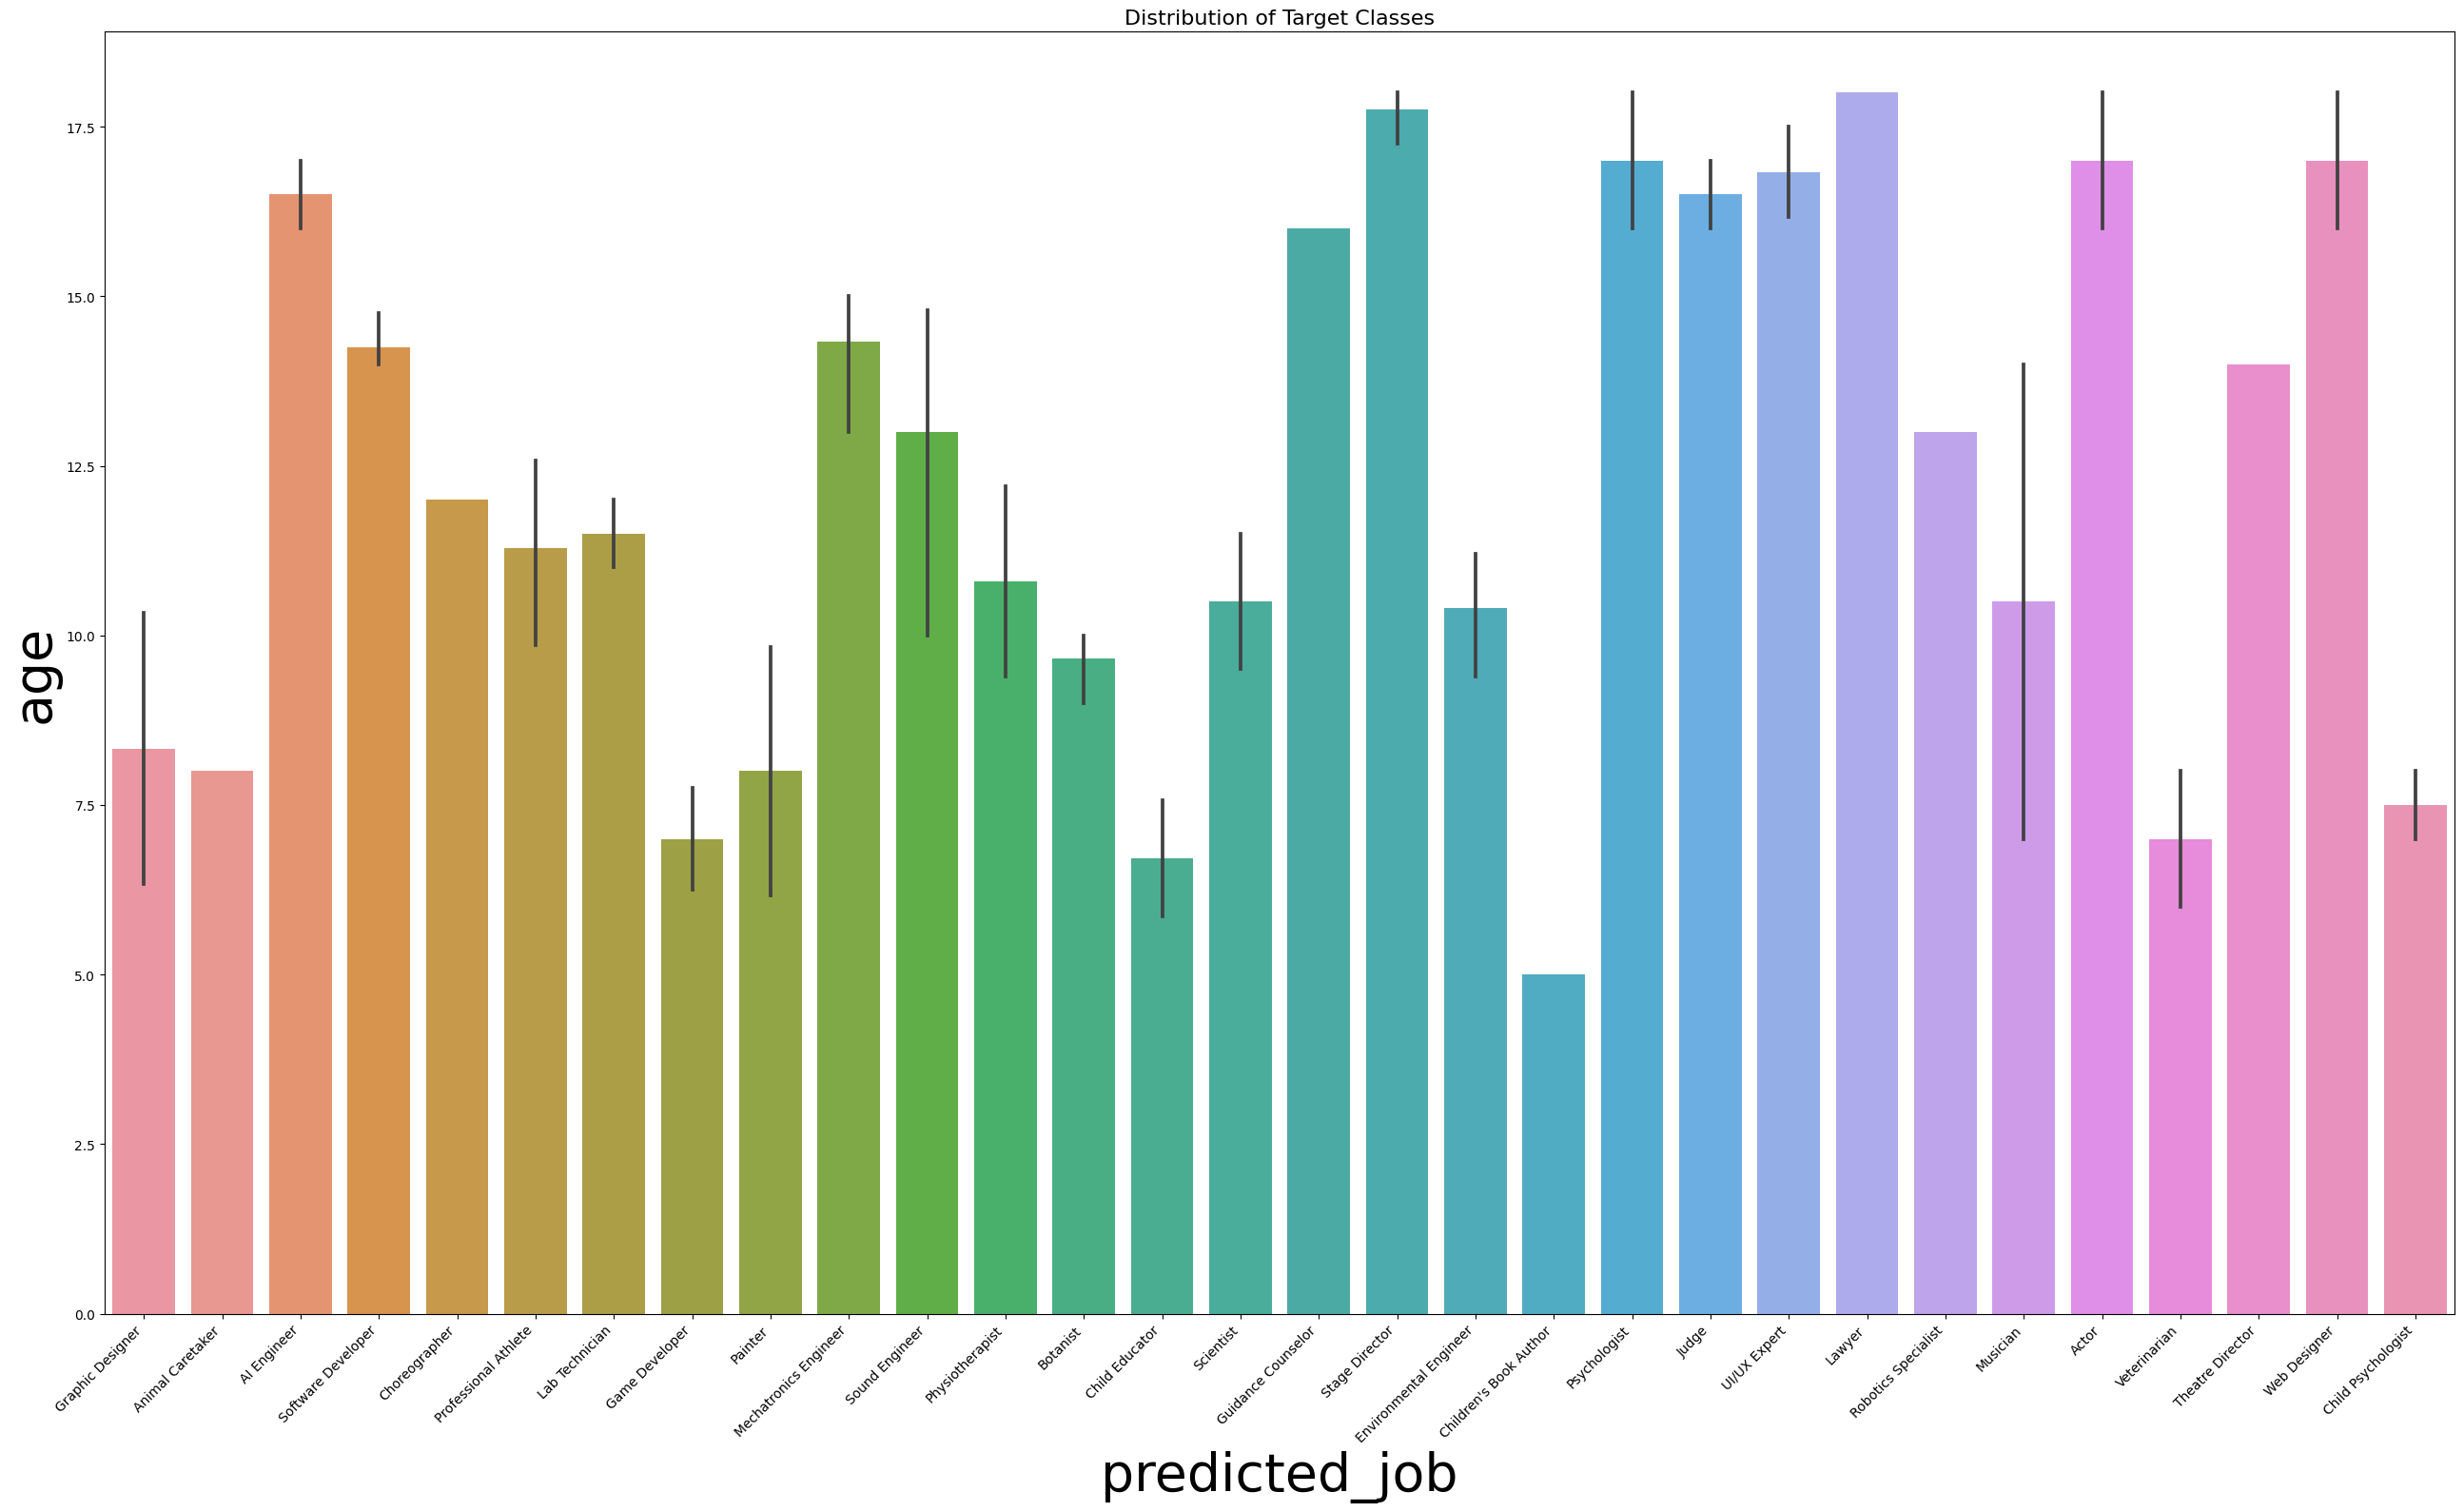

In [36]:
plt.figure(figsize=(26, 16))
sns.barplot(x='predicted_job', y='age', data=df)
plt.title('Distribution of Target Classes', fontsize=16)
plt.xlabel('predicted_job', fontsize=40)
plt.ylabel('age', fontsize=40)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Prevent label cutoff

plt.show()


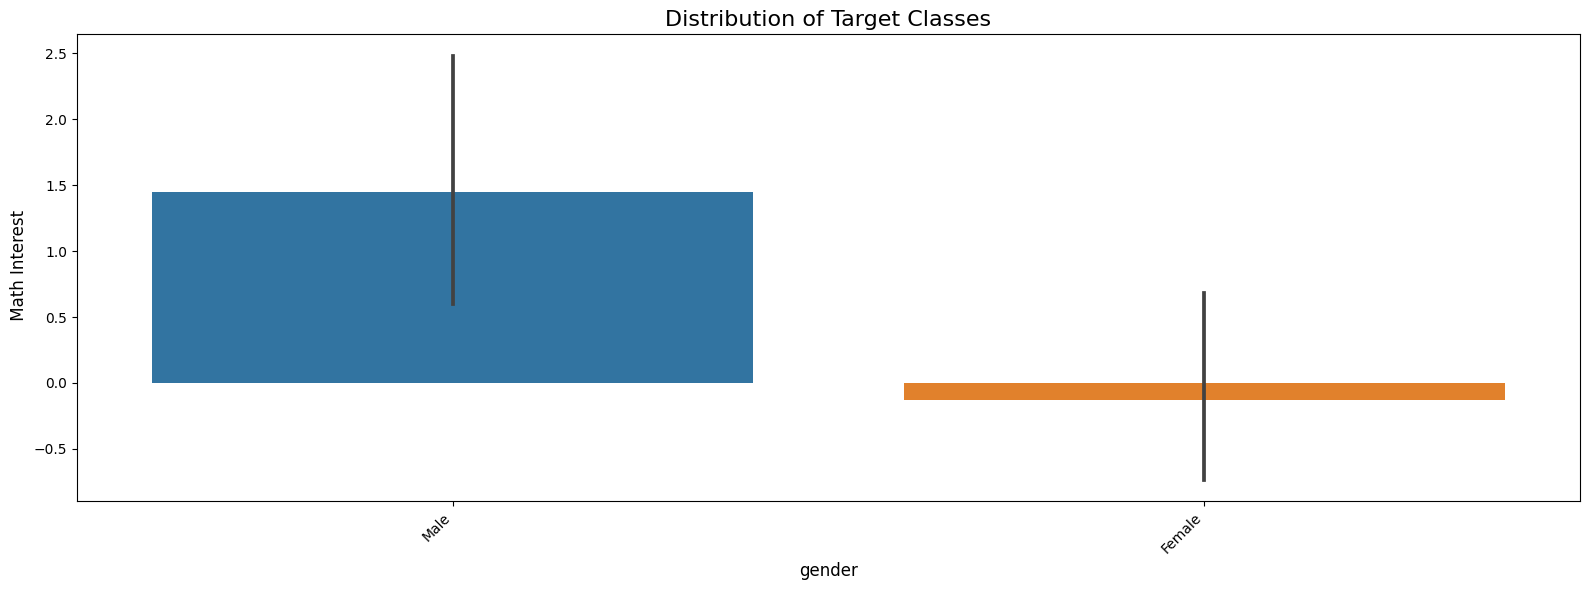

In [38]:
plt.figure(figsize=(16, 6))
sns.barplot(x='gender', y='Math Interest', data=df)
plt.title('Distribution of Target Classes', fontsize=16)
plt.xlabel('gender', fontsize=12)
plt.ylabel(' Math Interest', fontsize=12)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Prevent label cutoff

plt.show()

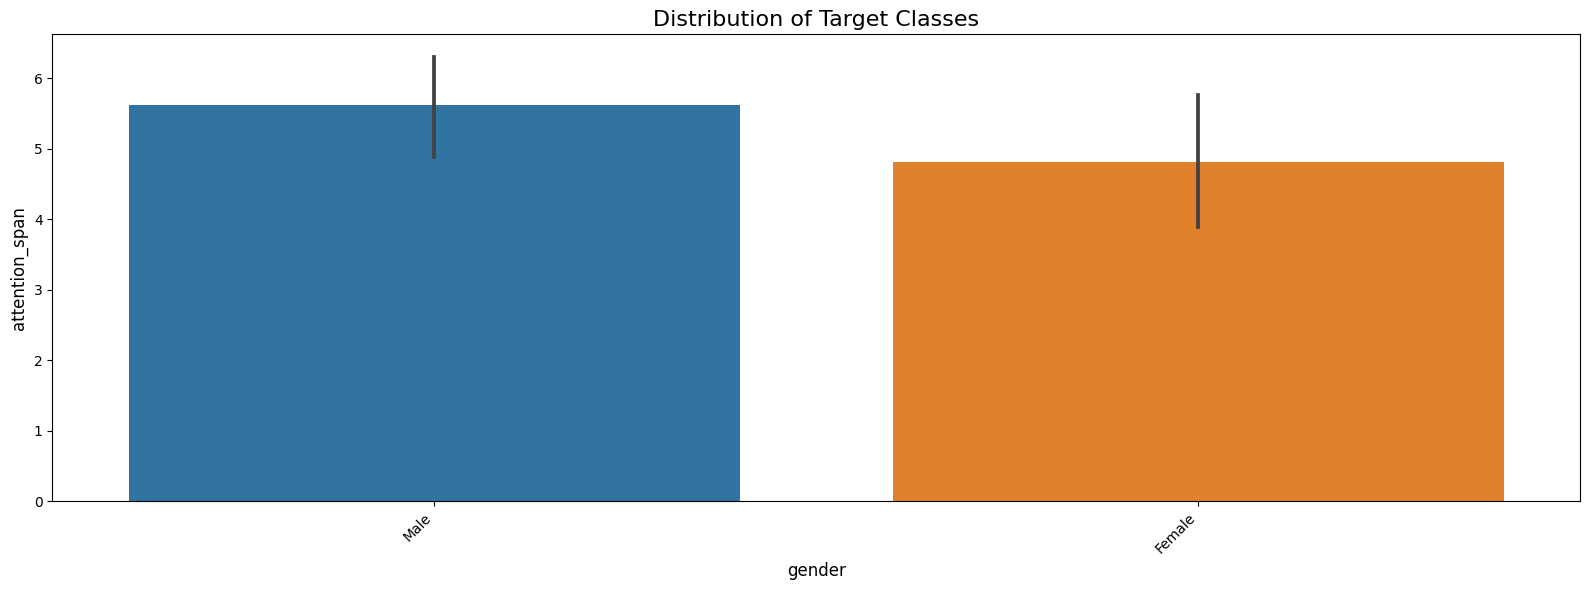

In [39]:
plt.figure(figsize=(16, 6))
sns.barplot(x='gender', y='attention_span', data=df)
plt.title('Distribution of Target Classes', fontsize=16)
plt.xlabel('gender', fontsize=12)
plt.ylabel('attention_span', fontsize=12)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Prevent label cutoff

plt.show()

## 6. Import necessary algorithms

In [55]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost 
from xgboost import XGBClassifier
import category_encoders
from category_encoders import TargetEncoder

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         100 non-null    object 
 1   age                            100 non-null    int64  
 2   age_group                      100 non-null    object 
 3   attention_span                 100 non-null    int64  
 4   creativity_score               100 non-null    int64  
 5   logical_reasoning              100 non-null    int64  
 6   verbal_intelligence            100 non-null    int64  
 7   visual_intelligence            100 non-null    int64  
 8   social_skills                  100 non-null    int64  
 9   motor_skills                   100 non-null    int64  
 10  Fairy Tale Interest            100 non-null    float64
 11  Motor Skills (Group Specific)  100 non-null    float64
 12  Color Cards                    100 non-null    floa

In [88]:
X = df.iloc[:,0:24]
y = df.iloc[:,-1]

## 7. Encoding the target variable 

In [89]:
lb = LabelEncoder()
encoded_y = lb.fit_transform(y)

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,encoded_y,test_size = 0.2,random_state = 42)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         100 non-null    object 
 1   age                            100 non-null    int64  
 2   age_group                      100 non-null    object 
 3   attention_span                 100 non-null    int64  
 4   creativity_score               100 non-null    int64  
 5   logical_reasoning              100 non-null    int64  
 6   verbal_intelligence            100 non-null    int64  
 7   visual_intelligence            100 non-null    int64  
 8   social_skills                  100 non-null    int64  
 9   motor_skills                   100 non-null    int64  
 10  Fairy Tale Interest            100 non-null    float64
 11  Motor Skills (Group Specific)  100 non-null    float64
 12  Color Cards                    100 non-null    floa

## 8. Enoding the categoric columns 

In [92]:
numeric_cols = ['age','attention_span','creativity_score','logical_reasoning','verbal_intelligence','visual_intelligence',
               'social_skills','motor_skills','Fairy Tale Interest','Motor Skills (Group Specific)','Color Cards','Reading Books',
               'Science Knowledge','Math Interest','Computer Games','Social Media Usage','Technology Interest','Career Goals',
               'University Choices','Future Planning']
oridinal = ['age_group']
caegoric = ['gender']
cat_cols = ['primary_interest','secondary_interest']


In [100]:
age_categories = [['Child','Teen','Young Adult','Unknown']]

In [101]:

od = OrdinalEncoder(categories = age_categories)
onehot = OneHotEncoder(handle_unknown = 'ignore',drop = 'first')
scaler = StandardScaler()

In [158]:
X['primary_interest']

0                     Science
1                     Animals
2     Artificial Intelligence
3                      Coding
4                      Nature
               ...           
95                    Theatre
96                    Animals
97    Artificial Intelligence
98                     Nature
99    Artificial Intelligence
Name: primary_interest, Length: 100, dtype: object

In [160]:
print(X_train.columns)
print(X_test.columns)


Index(['gender', 'age', 'age_group', 'attention_span', 'creativity_score',
       'logical_reasoning', 'verbal_intelligence', 'visual_intelligence',
       'social_skills', 'motor_skills', 'Fairy Tale Interest',
       'Motor Skills (Group Specific)', 'Color Cards', 'Reading Books',
       'Science Knowledge', 'Math Interest', 'Computer Games',
       'Social Media Usage', 'Technology Interest', 'Career Goals',
       'University Choices', 'Future Planning', 'primary_interest',
       'secondary_interest'],
      dtype='object')
Index(['gender', 'age', 'age_group', 'attention_span', 'creativity_score',
       'logical_reasoning', 'verbal_intelligence', 'visual_intelligence',
       'social_skills', 'motor_skills', 'Fairy Tale Interest',
       'Motor Skills (Group Specific)', 'Color Cards', 'Reading Books',
       'Science Knowledge', 'Math Interest', 'Computer Games',
       'Social Media Usage', 'Technology Interest', 'Career Goals',
       'University Choices', 'Future Planning', 'p

In [161]:
print(X_train[cat_cols].dtypes)


primary_interest      float64
secondary_interest    float64
dtype: object


In [162]:
X_train[cat_cols] = X_train[cat_cols].astype(str)
X_test[cat_cols] = X_test[cat_cols].astype(str)


## 9. Using target encoding separately

In [163]:
encoder = TargetEncoder()
X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols], y_train)
X_test[cat_cols] = encoder.transform(X_test[cat_cols])

In [164]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot',onehot,caegoric),
        ('ordinal',od,oridinal),
        ('scaler',scaler,numeric_cols)
    ]
)

In [165]:
rf = RandomForestClassifier(n_estimators=25,criterion='gini', max_depth=100,class_weight='balanced')

In [166]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

## 10. Using Pipeline separtely

In [167]:
pipeline = Pipeline([
    ('preprocesor',preprocessor),
    ('rf',rf)
])

In [168]:
pipeline2 = Pipeline([
    ('preprocesor',preprocessor),
    ('lr',lr)
])

In [169]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocesor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Child',
                                                                              'Teen',
                                                                              'Young '
                                                                              'Adult',
                                                                              'Unknown']]),
                                                  ['age_group']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'attention_span',
                                                   'creativity_score',
                                                   'logical_reasoning',
                                                   'verbal_intelligence',
                                                   'vis...igence',
                                                   'social_skills',
                                                   'motor_skills',
                                                   'Fairy Tale Interest',
                                                   'Motor Skills (Group '
                                                   'Specific)',
                                                   'Color Cards',
                                                   'Reading Books',
                                                   'Science Knowledge',
                                                   'Math Interest',
                                                   'Computer Games',
                                                   'Social Media Usage',
                                                   'Technology Interest',
                                                   'Career Goals',
                                                   'University Choices',
                                                   'Future Planning'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=100,
                                        n_estimators=25))])

In [170]:
pipeline2.fit(X_train,y_train) 

Pipeline(steps=[('preprocesor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Child',
                                                                              'Teen',
                                                                              'Young '
                                                                              'Adult',
                                                                              'Unknown']]),
                                                  ['age_group']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'attention_span',
                                                   'creativity_score',
                                                   'logical_reasoning',
                                                   'verbal_intelligence',
                                                   'visual_intelligence',
                                                   'social_skills',
                                                   'motor_skills',
                                                   'Fairy Tale Interest',
                                                   'Motor Skills (Group '
                                                   'Specific)',
                                                   'Color Cards',
                                                   'Reading Books',
                                                   'Science Knowledge',
                                                   'Math Interest',
                                                   'Computer Games',
                                                   'Social Media Usage',
                                                   'Technology Interest',
                                                   'Career Goals',
                                                   'University Choices',
                                                   'Future Planning'])])),
                ('lr', LogisticRegression(max_iter=1000))])

## 12. fit the Model

In [171]:
y_pred = pipeline.predict(X_test)

In [172]:
y_pred

array([27, 19,  0,  9, 25, 16,  7,  8,  3,  3,  4,  0, 27,  0,  9,  8, 25,
        4, 15, 26])

## 12. Check accuracy

In [173]:
scores = cross_val_score(pipeline, X, y, cv=5)  # 5-fold cross-validation

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.15 0.15 0.3  0.2  0.2 ]
Mean Accuracy: 0.2


In [174]:
y_pred2 = pipeline2.predict(X_test)

In [154]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred2))

0.2
